<a href="https://colab.research.google.com/github/tutsilianna/Introduction_to_ML_and_Advanced_ML_Python/blob/main/Clustering/Clustering_3_%7C_Exercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative model based on Gaussian mixtures

Gaussian mixtures are a natural mathematical generalization of the K-means algorithm. Essentially, the approach looks for some mixture of multivariate normal distributions (essentially also clumps around the mean with their variance) rather than just some clumps around the forming centroids. Since this approach estimates probability densities, it is often used in KDE (kernel density estimation) tasks. Among other things, it can be applied to the generation task: if there is a probability density function, we can sample and get new objects. In this task, we will look at the simplest example of solving such a problem.

Again, we'll be working with `MNIST`. Since the model turns out to be extremely heavy, we will use a "simple" dataset. Let's visualize the elements of this dataset (for clarity).

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.data.shape

(1797, 64)

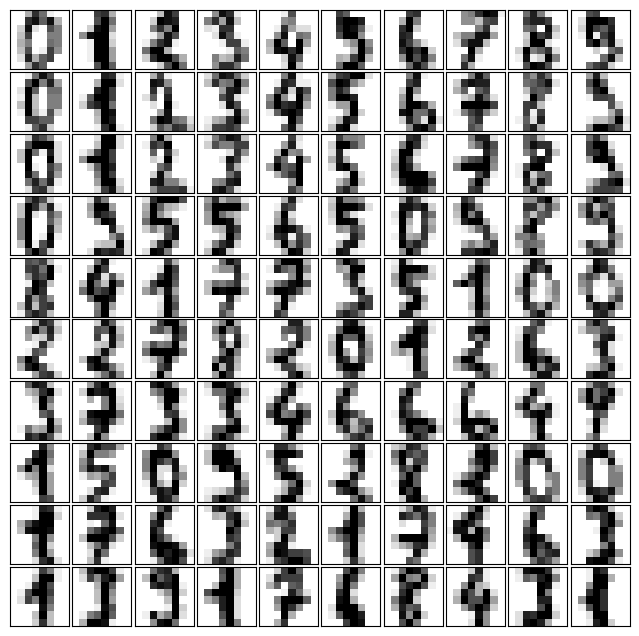

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits.data[i].reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

To make the training faster, it makes sense to reduce the dimensionality of the feature space. Perform the transformations for the entire dataset using <code>PCA(n_components=0.99, svd_solver=='full')</code>.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, svd_solver='full')

digits_pca = pca.fit_transform(digits.data)

Enter the number of principal components obtained.

In [ ]:
pca.n_components_

41

We train the model of interest by selecting the hyperparameter responsible for the number of components used, minimizing the <a href="https://en.wikipedia.org/wiki/Akaike_information_criterion">Akaike information criterion</a>.

For <code>n_components</code> values in the range \([50,250)\) in increments of \(10\) train models <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html"><code>GaussianMixture</code></a> with the following parameters: `covariance_type='full', random_state=29`. Use the method <code>.aic()</code> to calculate the criterion value of each model.

Enter the <code>n_components</code> value of the model with the lowest value of the Akaike criterion.

In [ ]:
from sklearn.mixture import GaussianMixture

results = {}
for n in range(50, 250, 10):
    gm = GaussianMixture(n_components=n, covariance_type='full', random_state=29).fit(digits_pca)
    results[n] = gm.aic(digits_pca)

In [ ]:
min_value = min(results.values())
min_keys = [key for key, value in results.items() if value == min_value]
print(min_keys)

[200]


Train the final model on the selected hyperparameter. Check that the training has converged (the field <code>.converged_</code> of the model).

In [ ]:
gm_final = GaussianMixture(n_components=min_keys[0], covariance_type='full', random_state=29).fit(digits_pca)
gm_final.converged_

True

Use the method <code>.sample()</code> to generate $100$ new objects.

Enter the sample mean of the cooridnates with index $0$ of the generated objects.

In [ ]:
new_objects = list(gm_final.sample(100))

In [ ]:
import numpy as np

first_elements = [obj[0] for obj in new_objects[0]]
round(np.mean(first_elements), 3)

0.984

Using the <code>.inverse_transform()</code> method of the class <code>PCA</code>, return the generated objects to the original feature space.

In [ ]:
original_objects = pca.inverse_transform(new_objects[0])

# Вывод исходных объектов
print(original_objects)

[[-1.03162261e-17  4.60047283e-01  8.01563069e+00 ... -2.49194114e-01
   3.28207513e-01  4.51908326e-01]
 [-9.28854943e-17 -1.94268381e-02 -1.13594229e-01 ...  1.47868423e+01
   8.48501741e+00  9.93313111e-01]
 [ 4.09443116e-17  1.00493392e+00  1.29338234e+01 ...  1.57976609e+01
   7.72854154e+00  2.40773282e+00]
 ...
 [ 4.68081347e-17  4.32488920e-01  1.01291337e+01 ...  9.65022474e+00
   3.47755004e-01 -1.64620022e-01]
 [ 3.86443474e-16  1.55690247e-01  3.31595664e+00 ...  4.04424371e+00
   4.18575510e-02 -1.09604351e-01]
 [ 1.03548085e-16 -1.57322652e-01 -4.16147185e-02 ...  8.25113043e+00
   3.74568651e-01 -1.38543579e-01]]


Visualize the results. Enter the image number corresponding to the generated object with the index specified in your assignment (indexing starts from zero).

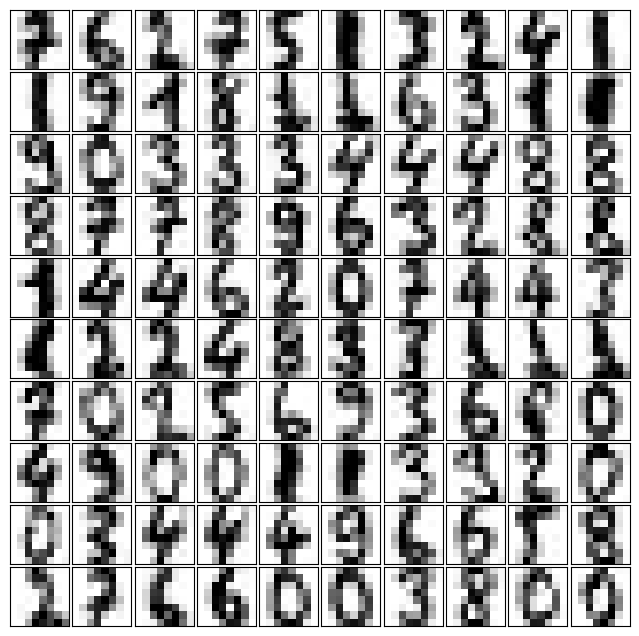

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(original_objects[i].reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

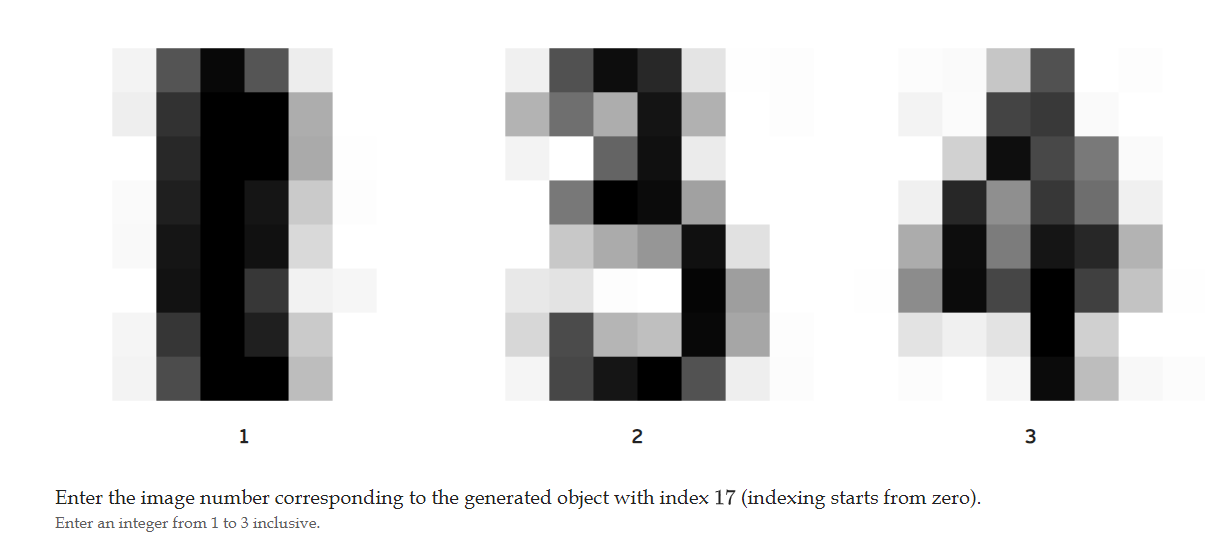

2